# Read Data

In [1]:
from numpy import genfromtxt
import numpy as np
import pylab as p

# read data from csv
def read_csv(trainPath,testPath):
    my_data_train = genfromtxt(trainPath, delimiter=',')  #reading data from csv file
    my_data_test = genfromtxt(testPath, delimiter=',')

    my_data_train1=my_data_train[1:]   #first row contains names, so drop it
    my_data_test1=my_data_test[1:]
    x1,y1=np.transpose(my_data_train1)
    x2,y2=np.transpose(my_data_test1)
    return x1,y1,x2,y2

# Visualize Data 

In [2]:
#Plot the graph of training data and testing data
def plot(x1,y1,x2,y2):
    fig,(ax1,ax2)=p.subplots(1,2)               
    ax1.plot(x1,y1,'o')
    ax1.set_title('Train  Data')
    ax1.set_xlabel('Feature')
    ax1.set_ylabel('Label')

    #Plot the graph of testing data
    ax2.plot(x2,y2,'o')
    ax2.set_title('Test Data')
    ax2.set_xlabel('Feature')
    ax2.set_ylabel('Label')

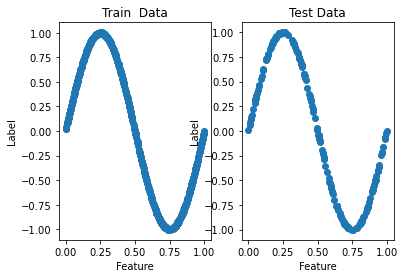

In [3]:
x1,y1,x2,y2=read_csv('train1.csv','test1.csv')
plot(x1,y1,x2,y2)

# Linear Regression

**1. Choose hypothesis:**           
              
$h(x)=w_0+w_1x+w_2x^2+w_3x^3+w_4x^4$

For a given input x:   

**1. create an input vector as**  $ X= [1, x, x^2, x^3, x^4]$      
          
          Resulting shape will be (m,5) where m is no. of training samples

**2. create a weight vector as** $ W=[w_0;w_1;w_2;w_3;w_4]$      
          
          Resulting shape will be (5,1)

   
   
##### Predicted output will be:   
   
          h=X*W    shape (m,1)


In [15]:
# Input vector   
# degree is the no. of features: here it is 4
def inp(x,degree=4):
    vector=np.array([x**i for i in range(degree+1)])
    return np.transpose(vector)

# weight vector  
def initialize_weights(degree=4):
    w=np.ones([degree+1,1])
    return w

### 2. Define Cost function:


$J(w)=\frac{1}{2m}\sum_{i=1}^{m} (h(x^i)-y^i)^2$

In [5]:
def costFn(h,y):
    error=h-y
    m=len(y)
    cost=(1/(2*m))*np.sum(np.power(error,2))
    return cost
    

# Train the model
1. Initialize weights
**Repeat until convergence or upto predefined no. of epochs:**     

{

2. Compute h(x)
3. Estimate error (h(x)-y)
4. Calculate cost using cost function
5. Update all parameters simultaneously using gradient descent:  
$\frac{\partial}{\partial w_j}(J(w))=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)x_j$   
$w_j=w_j-\alpha \frac{\partial}{\partial w_j}(J(w))$

}

In [49]:
def train(X,y1,epochs=100000):
    alpha=0.05
    W=initialize_weights()
    
    for i in range(epochs):
        h=np.dot(X,W)       #compute h(x)
        error=h-y1
        m=len(y1)
        W=W-((alpha/m)*np.dot(np.transpose(X),error))    #updation
    print('training error is',costFn(h,y1))
    return W,h
        
        

In [50]:
#W=initialize_weights()
X=inp(x1)
y1=np.reshape(y1,(len(y1),1))
W,htrain=train(X,y1)

training error is 0.008325867437784983


#### To continue training from present epoch:

In [51]:
def Cont_train(X,y1,W,epochs):
    alpha=0.05
    for i in range(epochs):
        h=np.dot(X,W)       #compute h(x)
        error=h-y1
        m=len(y1)
        W=W-((alpha/m)*np.dot(np.transpose(X),error))    #updation
    print('training error is',costFn(h,y1))
    return W,h

In [52]:
W,h=Cont_train(X,y1,W,epochs=10000)

training error is 0.007296788595932911


# Test the model

In [53]:
def test(x,y,W):
    X=inp(x)
    pred=np.dot(X,W)
    error=costFn(pred,y)
    print("test error is",error)
    return pred
    

In [54]:
y2=np.reshape(y2,(len(y2),1))
htest=test(x2,y2,W)

test error is 0.007520253390878739


#  Visualization of the fitted Curves

In [60]:
import matplotlib.pyplot as plt
def plotcurve(x,h,title):
    plt.plot(x,h,'o')
    plt.title('Train Data')
    plt.xlabel('Feature')
    plt.ylabel('Label')

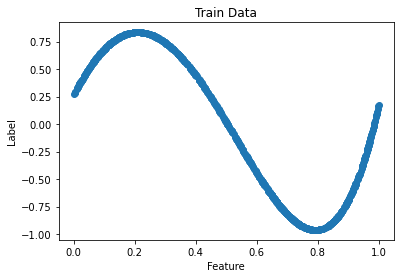

In [61]:
plotcurve(x1,htrain,'Train Data')

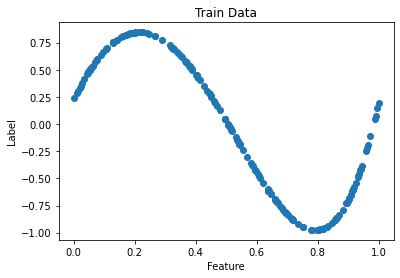

In [62]:
plotcurve(x2,htest,'Test Data')